<b>Import Library</b>

In [101]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from xgboost.sklearn import XGBClassifier, XGBRegressor
from sklearn.metrics import f1_score, confusion_matrix, classification_report, mean_squared_error, r2_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

from pylab import rcParams
rcParams['figure.figsize'] = 20, 15

<b>Exploratory Data Anaylsis</b>

In [5]:
df = pd.read_csv("data/weatherAUS.csv")

In [6]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [7]:
df["Date"] = pd.to_datetime(df["Date"])

In [8]:
df["Month"] = df["Date"].dt.month

In [9]:
df.shape

(142193, 25)

In [10]:
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RISK_MM                 float64
RainTomorrow             object
Month                     int64
dtype: object

In [43]:
df["RainTomorrow"].value_counts()

0    110316
1     31877
Name: RainTomorrow, dtype: int64

In [11]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,Month
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682,6.402544
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969,3.426506
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000,3.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000,6.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000,9.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000,12.000000


&lt;matplotlib.axes._subplots.AxesSubplot at 0x253c36d5b50&gt;

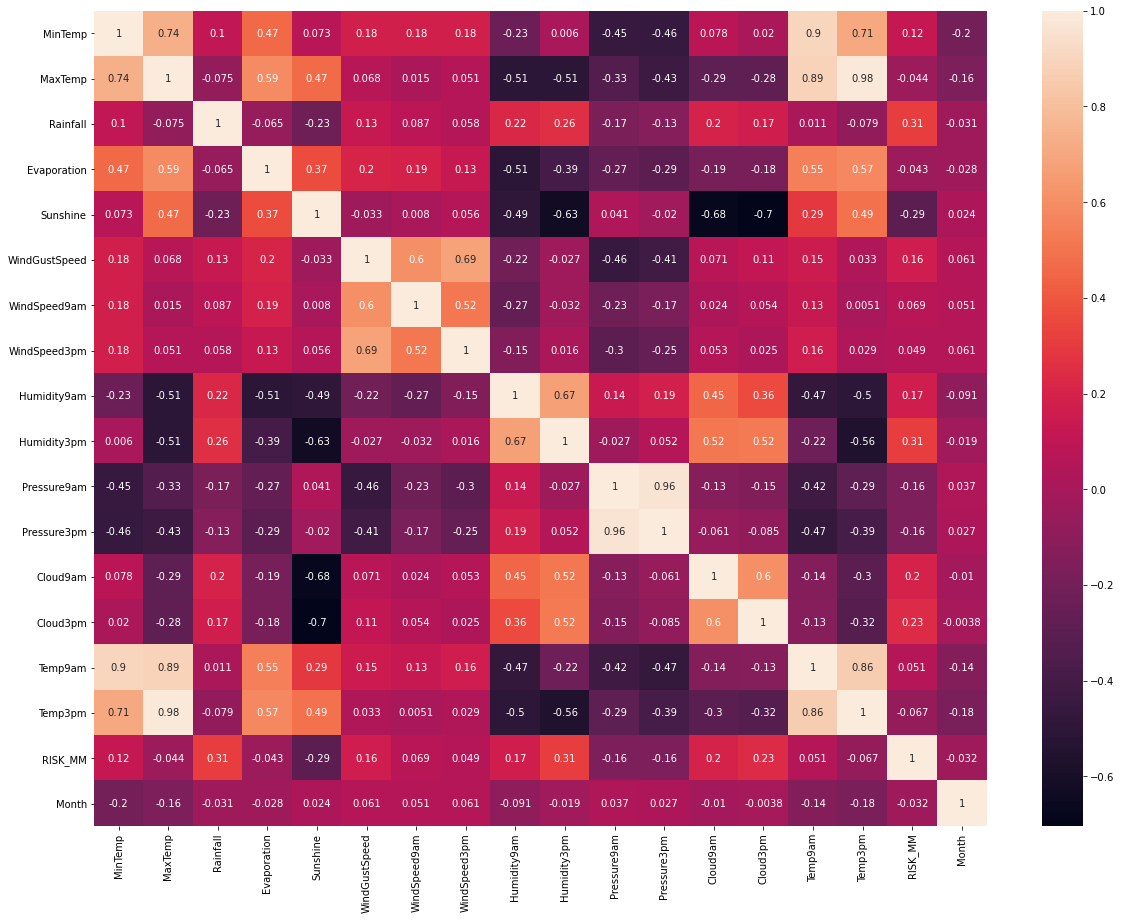

In [12]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)

<b>Data Preprocessing</b>

In [13]:
y = df["RainTomorrow"]
X = df.drop(columns = ["RISK_MM", "RainTomorrow", "Location", "Date"])

In [14]:
y[y == "Yes"] = 1
y[y == "No"] = 0

In [15]:
y = y.astype("int")

In [16]:
X = pd.get_dummies(X, columns=["WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "Month"], drop_first=True)

In [17]:
X.isnull().sum().sort_values()

WindDir9am_NNW        0
WindDir3pm_NNW        0
WindDir3pm_NNE        0
WindDir3pm_NE         0
WindDir3pm_N          0
                  ...  
Pressure9am       14014
Cloud9am          53657
Cloud3pm          57094
Evaporation       60843
Sunshine          67816
Length: 73, dtype: int64

In [18]:
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,0,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,1
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,NaN,NaN,31.0,15.0,13.0,59.0,27.0,...,0,0,0,1,0,0,0,0,0,0
142189,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,...,0,0,0,1,0,0,0,0,0,0
142190,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,...,0,0,0,1,0,0,0,0,0,0
142191,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,...,0,0,0,1,0,0,0,0,0,0


<b>Machine Learning by XGBClassfier</b>

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
X_train_imputed = imp.fit_transform(X_train)
X_test_imputed = imp.fit_transform(X_test)

In [21]:
X_train[:] = X_train_imputed
X_test[:] = X_test_imputed

In [22]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train[:] = X_train_scaled
X_test_scaled = scaler.transform(X_test)
X_test[:] = X_test_scaled

In [23]:
"""
from pycaret.datasets import get_data
from pycaret.classification import *

rain = setup(X, target = "RainTomorrow")
"""
#best = compare_models()
#xgb = create_model("xgboost")

&#39;\nfrom pycaret.datasets import get_data\nfrom pycaret.classification import *\n\nrain = setup(X, target = &quot;RainTomorrow&quot;)\n&#39;

In [25]:
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,0,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,1
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
y

0         0
1         0
2         0
3         0
4         0
         ..
142188    0
142189    0
142190    0
142191    0
142192    0
Name: RainTomorrow, Length: 142193, dtype: int32

In [27]:
y_test

36704    0
44411    0
96159    1
44406    0
6113     0
        ..
4000     0
37131    0
67752    0
17831    0
25573    0
Name: RainTomorrow, Length: 28439, dtype: int32

In [28]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=0.1, gamma=0.1,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=9,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=&#39;gbtree&#39;, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=0.1, gamma=0.1,
              gpu_id=-1, importance_type=&#39;gain&#39;, interaction_constraints=&#39;&#39;,
              learning_rate=0.100000001, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints=&#39;()&#39;,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=&#39;exact&#39;, validate_parameters=1, verbosity=None)

In [30]:
print(model)

XGBClassifier(base_score=0.5, booster=&#39;gbtree&#39;, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=0.1, gamma=0.1,
              gpu_id=-1, importance_type=&#39;gain&#39;, interaction_constraints=&#39;&#39;,
              learning_rate=0.100000001, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints=&#39;()&#39;,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=&#39;exact&#39;, validate_parameters=1, verbosity=None)


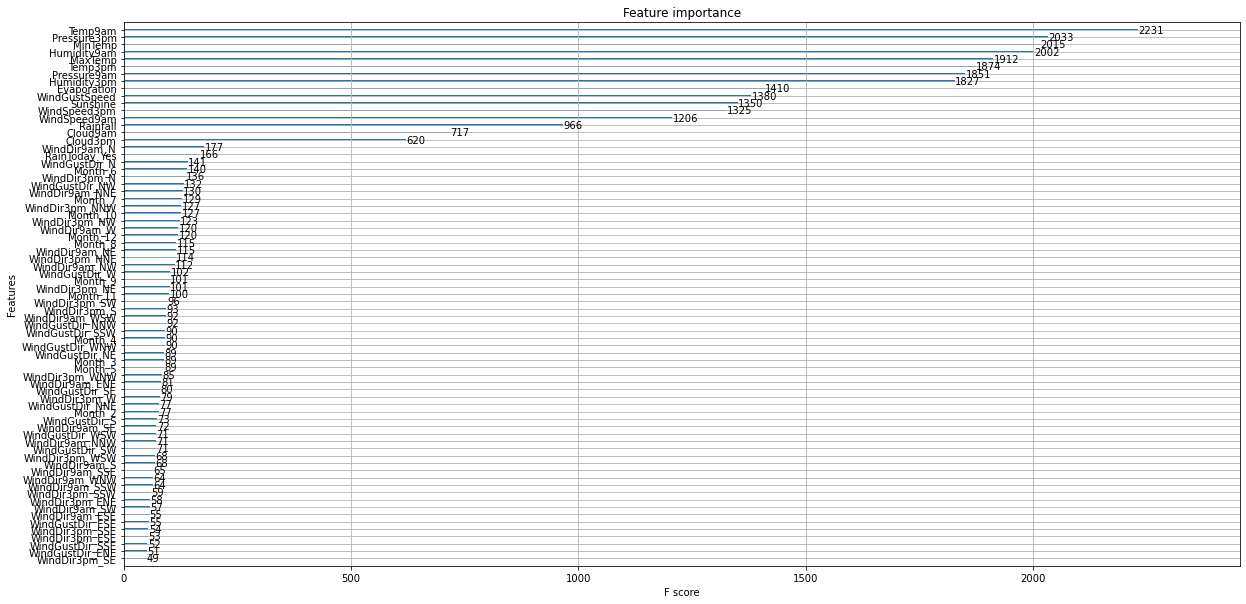

In [31]:
"""
fig, ax = plt.subplots(figsize=(h, w))
xgboost.plot_importance(..., ax=ax)
"""
ax = xgb.plot_importance(model)
fig = ax.figure
fig.set_size_inches(20,10)

In [32]:
X["RainToday_Yes"].sum()

31455

In [35]:
pred = model.predict(X_test)

In [36]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
y_test = y_test.astype("int")

In [39]:
confusion_matrix(y_test, pred)

array([[21009,  1052],
       [ 2982,  3396]], dtype=int64)

In [40]:

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     22061
           1       0.76      0.53      0.63      6378

    accuracy                           0.86     28439
   macro avg       0.82      0.74      0.77     28439
weighted avg       0.85      0.86      0.85     28439



In [41]:

math.sqrt(mean_squared_error(y_test, pred))

0.37662642364943427

In [42]:


f1_score(y_test, pred)

0.627378533160909

In [94]:


clf = xgb.XGBClassifier()
parameters = {
    "eta": [0.10, 0.20, 0.30],
    "max_depth": range(3, 10, 2),
    "min_child_weight": [1, 3],
    "gamma": [0.0, 0.1, 0.2],
    "colsample_bytree": [0.5, 1]}

grid = GridSearchCV(clf, parameters, n_jobs=4, cv=5)

In [95]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [96]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=0.1, gamma=0.1,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=9,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<b>Machine Learning by XGBRegression</b>

In [99]:
df2 = pd.read_csv("data/weatherAUS.csv")

In [101]:
df2["Date"] = pd.to_datetime(df["Date"])
df2["Month"] = df2["Date"].dt.month

In [103]:
y = df2["RISK_MM"]
X = df2.drop(columns = ["RISK_MM", "RainTomorrow", "Location", "Date"])

In [104]:
X = pd.get_dummies(X, columns=["WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "Month"], drop_first=True)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [106]:
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
X_train_imputed = imp.fit_transform(X_train)
X_test_imputed = imp.fit_transform(X_test)

In [107]:
X_train[:] = X_train_imputed
X_test[:] = X_test_imputed

In [108]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train[:] = X_train_scaled
X_test_scaled = scaler.transform(X_test)
X_test[:] = X_test_scaled

In [109]:
# Build a model with XGBRegressor
model = XGBRegressor(eta=0.1, gamma=0.1, max_depth=9, n_estimators=100, n_jobs=0, random_state=0)


In [110]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0.1,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.100000001, max_delta_step=0, max_depth=9,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

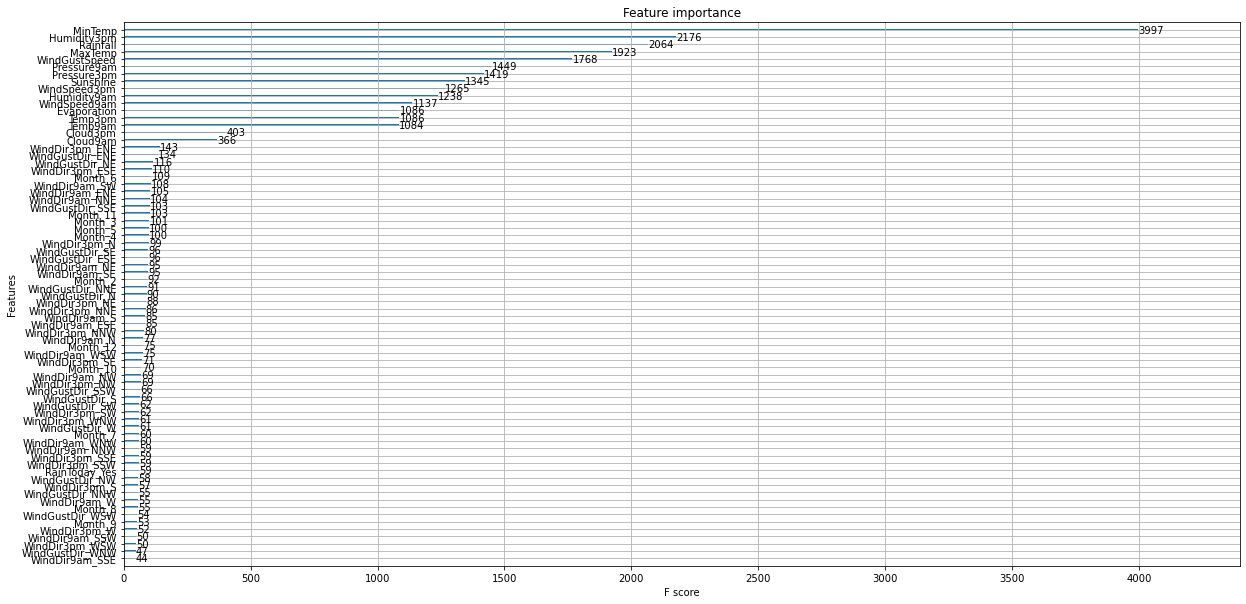

In [111]:
ax = xgb.plot_importance(model)
fig = ax.figure
fig.set_size_inches(20,10)

In [115]:
model = XGBRegressor(eta=0.1, n_estimators=100, n_jobs=0, random_state=0, booster="gblinear")
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, eta=0.1, gamma=None,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.5, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=None, random_state=0,
             reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=None,
             tree_method=None, validate_parameters=1, verbosity=None)

In [116]:
model.coef_

array([-1.07615e-01,  3.34816e-01,  1.67679e+00,  9.63205e-02,
       -7.66056e-01,  1.44074e+00,  4.06496e-02, -7.15828e-01,
        9.57251e-02,  2.26356e+00,  6.38523e-01, -1.11621e+00,
       -1.73955e-01,  2.72313e-01,  3.45092e-01,  2.08058e-01,
        4.60271e-02,  5.59433e-02, -4.04424e-03, -1.57516e-02,
       -1.34788e-03, -4.67059e-02, -1.82978e-02,  5.65331e-02,
        4.74834e-02,  9.35255e-02, -3.14995e-02, -4.49315e-02,
       -1.10834e-01, -4.11723e-02, -4.06287e-02,  9.88052e-02,
        6.72046e-03, -1.07506e-01,  5.75205e-02,  3.28671e-02,
       -1.46526e-01, -1.60074e-01, -6.29790e-02, -1.01910e-02,
       -8.72680e-02, -1.00254e-01, -5.11150e-02, -1.83562e-01,
       -9.15577e-02, -1.32566e-01,  2.85928e-02, -2.14803e-02,
        3.25077e-02, -1.06623e-01, -1.54652e-03,  1.11455e-01,
        8.59305e-02, -2.89385e-02, -7.40532e-02, -7.19547e-02,
        6.78694e-03, -4.33544e-03, -5.39887e-02,  5.92739e-02,
       -4.21513e-02, -2.41107e-02,  4.59964e-02, -6.133

In [124]:
X_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'WindGustDir_ENE', 'WindGustDir_ESE',
       'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
       'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE',
       'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW',
       'WindGustDir_WSW', 'WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N',
       'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW', 'WindDir9am_NW',
       'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE', 'WindDir9am_SSW',
       'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW', 'WindDir9am_WSW',
       'WindDir3pm_ENE', 'WindDir3pm_ESE', 'WindDir3pm_N', 'WindDir3pm_NE',
       'WindDir3pm_NNE', 'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S',
       'WindDir3pm_S

In [126]:
df_coef = pd.DataFrame(data= {"Para": X_train.columns, "Coef": model.coef_})

In [128]:
df_coef.sort_values(by=["Coef"], ascending=False, inplace=True)

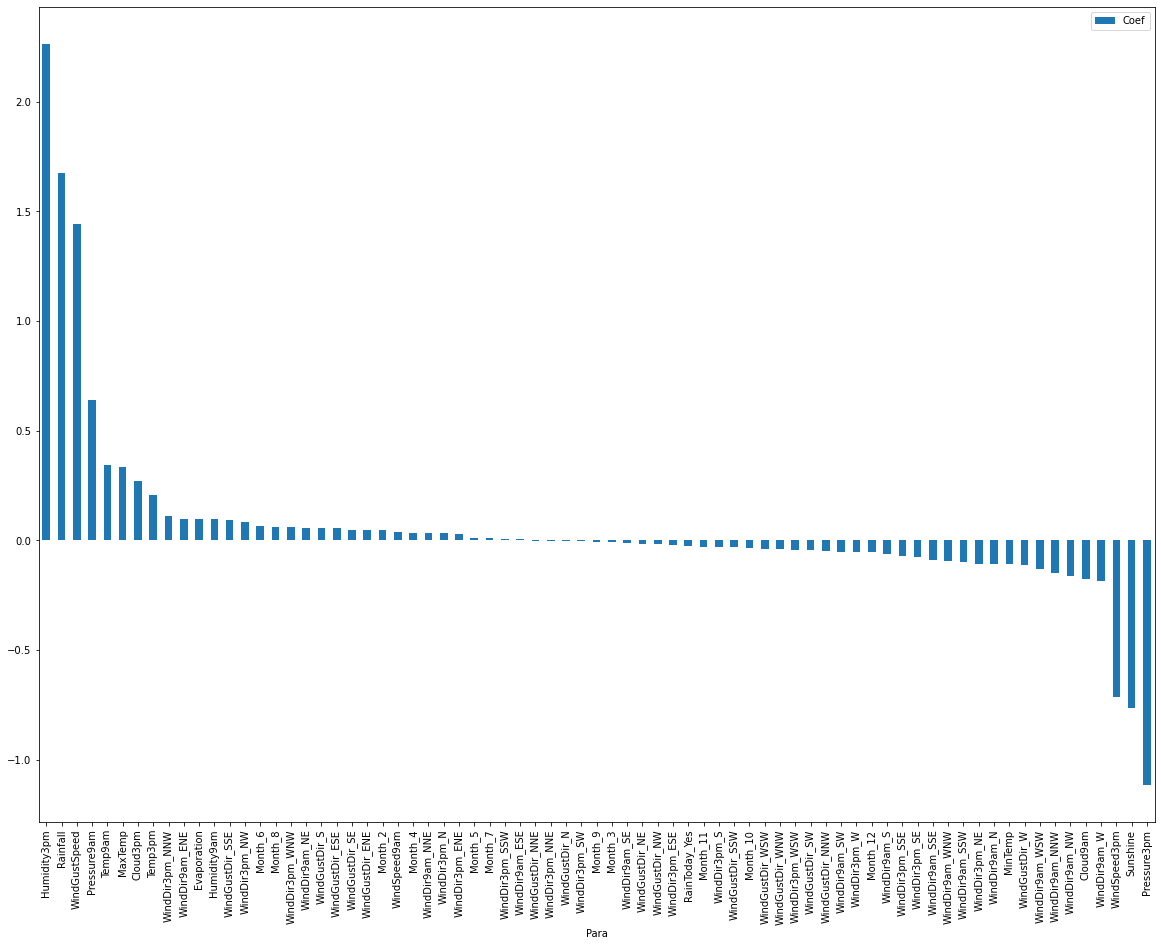

In [139]:
# weight of features after XGBRegression
df_coef.plot.bar(x="Para")

In [140]:
model.intercept_

array([1.86896])

In [141]:
pred = model.predict(X_test)

In [151]:

r2_score(y_test, pred)

0.20725923462906082

In [175]:
# Repeat the learning after dropping irrelevant/noisy columns

df = pd.read_csv("data/weatherAUS.csv")

In [176]:
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month

In [177]:
df["Humidity"] = (df["Humidity9am"]+df["Humidity3pm"])/2
df["Pressure"] = (df["Pressure9am"]+df["Pressure3pm"])/2
df["Cloud"] = (df["Cloud9am"]+df["Cloud3pm"])/2
df["WindSpeed"] = (df["WindSpeed9am"]+df["WindSpeed3pm"])/2

In [178]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Month,Humidity,Pressure,Cloud,WindSpeed
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,16.9,21.8,No,0.0,No,12,46.5,1007.40,NaN,22.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,17.2,24.3,No,0.0,No,12,34.5,1009.20,NaN,13.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,21.0,23.2,No,0.0,No,12,34.0,1008.15,NaN,22.5
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,18.1,26.5,No,1.0,No,12,30.5,1015.20,NaN,10.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,17.8,29.7,No,0.2,No,12,57.5,1008.40,7.5,13.5


In [179]:
y = df["RainTomorrow"]
X = df.drop(columns = ["RISK_MM", "RainTomorrow", "Location", "Date", "Evaporation", "WindGustDir", "WindGustSpeed", "WindDir9am", "WindDir3pm", "Month", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "WindSpeed9am", "WindSpeed3pm", "RainToday", "Temp9am", "Temp3pm"])

In [181]:
y[y == "Yes"] = 1
y[y == "No"] = 0
y = y.astype("int")

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [183]:
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
X_train_imputed = imp.fit_transform(X_train)
X_test_imputed = imp.fit_transform(X_test)

In [184]:
X_train[:] = X_train_imputed
X_test[:] = X_test_imputed

In [185]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train[:] = X_train_scaled
X_test_scaled = scaler.transform(X_test)
X_test[:] = X_test_scaled

In [186]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=0.1, gamma=0.1,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=9,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [187]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=&#39;gbtree&#39;, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=0.1, gamma=0.1,
              gpu_id=-1, importance_type=&#39;gain&#39;, interaction_constraints=&#39;&#39;,
              learning_rate=0.100000001, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints=&#39;()&#39;,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=&#39;exact&#39;, validate_parameters=1, verbosity=None)

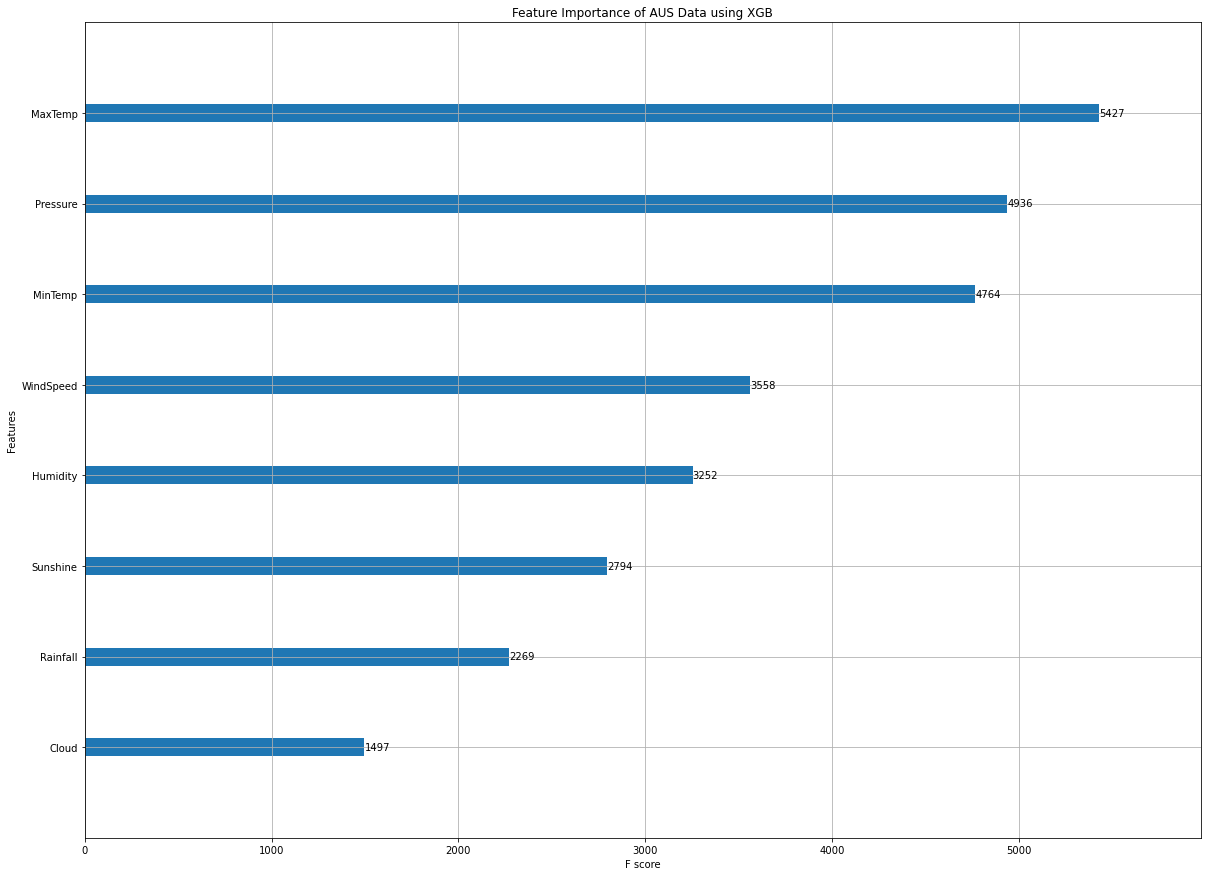

In [188]:
xgb.plot_importance(model)
plt.title('Feature Importance of AUS Data using XGB')
fig = ax.figure
fig.set_size_inches(20,10)

In [133]:
pred = model.predict(X_test)

In [134]:
confusion_matrix(y_test, pred)

array([[20913,  1157],
       [ 3420,  2949]], dtype=int64)

In [135]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22070
           1       0.72      0.46      0.56      6369

    accuracy                           0.84     28439
   macro avg       0.79      0.71      0.73     28439
weighted avg       0.83      0.84      0.83     28439



In [136]:
roc_auc_score(y_test, pred)

0.7052999587447212

In [137]:
model.predict_proba(X_test)[0:20]

array([[0.996746  , 0.00325399],
       [0.9068636 , 0.09313645],
       [0.92253625, 0.07746375],
       [0.94110715, 0.05889283],
       [0.6362959 , 0.3637041 ],
       [0.9302545 , 0.06974547],
       [0.8952619 , 0.10473809],
       [0.8859781 , 0.1140219 ],
       [0.9758217 , 0.02417835],
       [0.92409873, 0.07590126],
       [0.98798734, 0.01201264],
       [0.8924655 , 0.10753454],
       [0.9650206 , 0.0349794 ],
       [0.98428845, 0.01571156],
       [0.67933464, 0.32066536],
       [0.9318999 , 0.06810009],
       [0.8991026 , 0.10089735],
       [0.3145038 , 0.6854962 ],
       [0.46532953, 0.5346705 ],
       [0.9744098 , 0.0255902 ]], dtype=float32)

In [149]:
# Apply the AUS model to HK data

df_hk = pd.read_csv("data/weather_hk_cut.csv")
df_hk.drop(columns=["Unnamed: 0"], inplace=True)
df_hk.dropna(inplace=True)

In [158]:
df_hk.dtypes

Pressure        float64
MaxTemp         float64
MinTemp         float64
Humidity          int64
Cloud             int64
Sunshine        float64
WindSpeed       float64
Rainfall        float64
RainTomorrow      int64
dtype: object

In [159]:
y = df_hk["RainTomorrow"]
X = df_hk.drop(columns = ["RainTomorrow"])

In [161]:
cols_hk = ['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 'Humidity', 'Pressure', 'Cloud', 'WindSpeed']

In [162]:
X = X[cols_hk]

In [165]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X[:] = X_scaled

In [166]:
pred_hk = model.predict(X)

In [167]:
print(classification_report(y, pred_hk))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85      5171
           1       0.65      0.36      0.46      1974

    accuracy                           0.77      7145
   macro avg       0.72      0.64      0.66      7145
weighted avg       0.75      0.77      0.75      7145



In [168]:
# Try to use HK data to build another model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [169]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=0.1, gamma=0.1,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=9,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=&#39;gbtree&#39;, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=0.1, gamma=0.1,
              gpu_id=-1, importance_type=&#39;gain&#39;, interaction_constraints=&#39;&#39;,
              learning_rate=0.100000001, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints=&#39;()&#39;,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=&#39;exact&#39;, validate_parameters=1, verbosity=None)

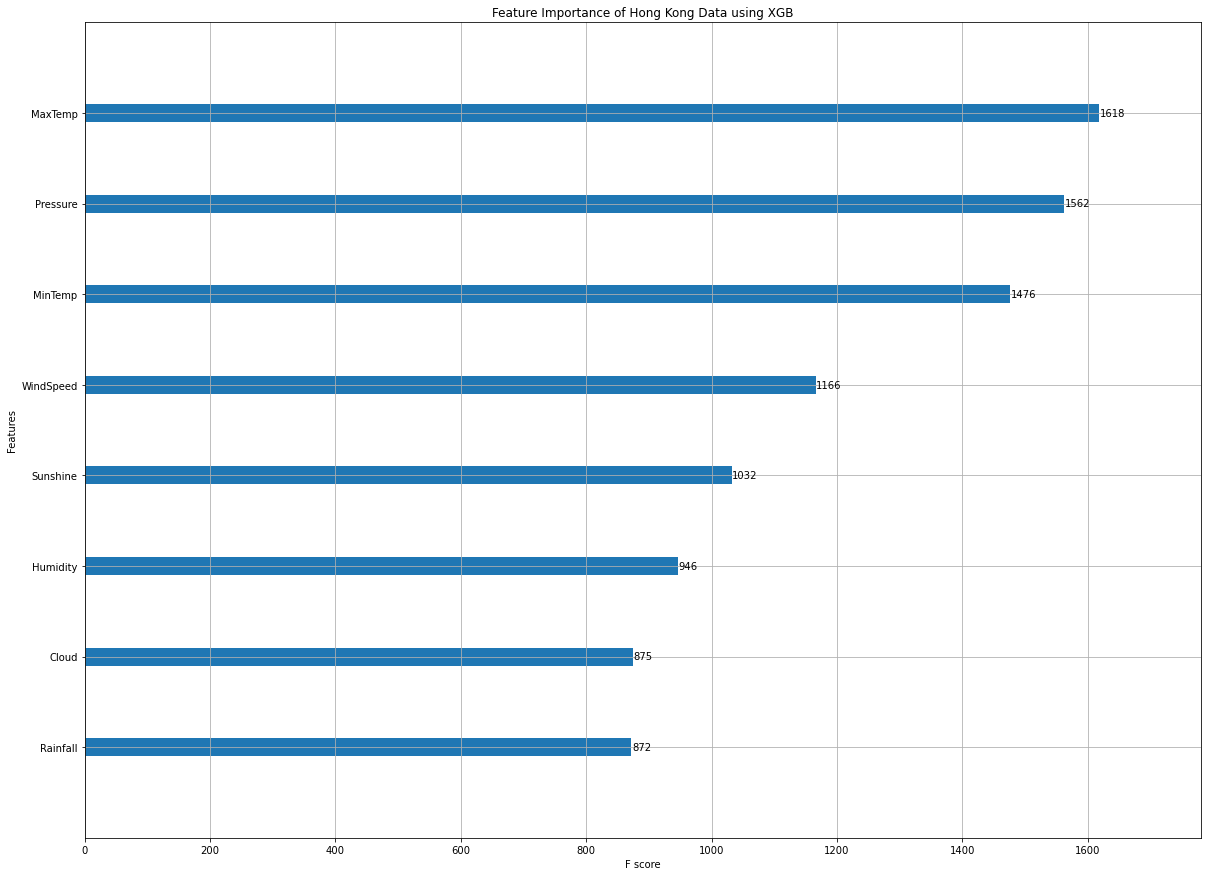

In [174]:
xgb.plot_importance(model)
plt.title('Feature Importance of Hong Kong Data using XGB')
fig = ax.figure
fig.set_size_inches(20,10)

In [171]:
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1047
           1       0.61      0.49      0.54       382

    accuracy                           0.78      1429
   macro avg       0.72      0.69      0.70      1429
weighted avg       0.77      0.78      0.77      1429

